In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
dataframe=pd.read_csv('dataset.csv')

In [3]:
#Dropping features which have more than 50% NaN values and other features
dataframe=dataframe.drop(dataframe.index[5])
for columns in dataframe:
    if(dataframe[columns].isna().sum()>177):
        dataframe=dataframe.drop(columns,axis=1)
drops=["Architecture","SIM 1","SIM 2","SIM Size","Launch Date","Brand","USB OTG Support","SIM Slot(s)","Screen to Body Ratio (calculated)","Sensor","Screen Protection","Loudspeaker","Autofocus","Camera Features","PhoneId","Model","Network","Screen Resolution","Video Recording","Wi-Fi"]
dataframe=dataframe.drop(drops,axis=1)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 354
Data columns (total 43 columns):
Aspect Ratio                   204 non-null object
Audio Jack                     343 non-null object
Bluetooth                      351 non-null object
Capacity                       354 non-null object
Chipset                        329 non-null object
Colours                        354 non-null object
Display Type                   354 non-null object
Expandable Memory              353 non-null object
FM Radio                       281 non-null object
Fingerprint Sensor             335 non-null object
Fingerprint Sensor Position    219 non-null object
Flash                          342 non-null object
GPS                            333 non-null object
Graphics                       325 non-null object
Height                         340 non-null object
Image Resolution               348 non-null object
Internal Memory                337 non-null object
NFC                         

In [5]:
dataframe.to_csv("prepdf.csv",index=False)

In [6]:
dataframe=pd.read_csv('prepdf.csv')

# Replacing NaN values with mode in Mean and Mode values in Continuous adn Categorical variable repectively

In [7]:
ar=[]
dataframe["Aspect Ratio"]=dataframe["Aspect Ratio"].fillna(-1)
for r in dataframe["Aspect Ratio"]:
    if r == '18:9' or r == '16:9' or r == '19:9' or r == '19.5:9' or r == '18.5:9':
        ar.append(r)
    else:
        ar.append('Rare')
dataframe["Aspect Ratio"]=ar
dataframe['Aspect Ratio'] = le.fit_transform(dataframe['Aspect Ratio'])

dataframe["Audio Jack"]=dataframe["Audio Jack"].fillna("3.5 mm")
dataframe['Audio Jack'] = le.fit_transform(dataframe['Audio Jack'])

dataframe["Bluetooth"]=dataframe["Bluetooth"].fillna("no")
bt=[]
for x in dataframe["Bluetooth"]:
    if x=="v4.2" or x=="v4.0" or x=="v5.0" or x=="v4.1" or x=="yes":
        bt.append(1)
    else:
        bt.append(0)
dataframe["Bluetooth"]=bt



In [8]:
capacity=list()
for x in dataframe["Capacity"].fillna("3000 mAh"):
    capacity.append(int(x.split(" ")[0]))
dataframe["Capacity"]=capacity

chip_name=set(dataframe["Chipset"].astype(str))
chip_val=[]
for i in chip_name:
    y=i.split()
    chip_val.append(y[0])
print(Counter(chip_val).keys() ,"\n",Counter(chip_val).values())
chipset=[]
for x in dataframe["Chipset"].fillna("Qualcomm"):
      chipset.append(x.split(" ")[0])
dataframe["Chipset"]=chipset
dataframe['Chipset'] = le.fit_transform(dataframe['Chipset'])

colour_num=[]
for x in dataframe["Colours"].fillna("No"):
    y=x.split(",")
    if y[0] == "No":
        colour_num.append(0)
    else:
        colour_num.append(len(y))
dataframe["Colours"]=colour_num

dict_keys(['MediaTek', 'Spreadtrum', 'Qualcomm', 'Apple', 'Samsung', 'HiSilicon', 'Intel', 'Unisoc', 'nan']) 
 dict_values([24, 8, 35, 6, 13, 7, 1, 1, 1])


In [9]:
dataframe["Display Type"]=dataframe["Display Type"].fillna("IPS LCD ")
dataframe["Display Type"]=le.fit_transform(dataframe["Display Type"])

In [10]:
l=[]
for x in dataframe["Expandable Memory"].fillna("No"):
    if x=="No":
        l.append(0)
    else:
        z= x.split(" ")[2]
        if z=="2":
            l.append(2000)
        else:
            l.append(int(z))
dataframe["Expandable Memory"]=l

In [11]:
radio_count=[]
for y in dataframe["FM Radio"].fillna("Rare"):
    if y=="yes" or y=="No" or y=="Recording option":
        radio_count.append(y)
    else:
        radio_count.append("Rare")
dataframe["FM Radio"]=radio_count
dataframe["FM Radio"]=le.fit_transform(dataframe["FM Radio"])

In [12]:
dataframe["Fingerprint Sensor"]=dataframe["Fingerprint Sensor"].fillna("yes")
dataframe["Fingerprint Sensor"]=le.fit_transform(dataframe["Fingerprint Sensor"])
dataframe["Fingerprint Sensor"].value_counts()

1    240
0    114
Name: Fingerprint Sensor, dtype: int64

In [13]:
dataframe["Fingerprint Sensor Position"]=dataframe["Fingerprint Sensor Position"].fillna("No")
dataframe['Fingerprint Sensor Position'] = le.fit_transform(dataframe['Fingerprint Sensor Position'])

In [14]:
flash_pres = []
for i in dataframe['Flash'].fillna('yes'):
    if i != 'No':
        flash_pres.append(1)
        
    else:
        flash_pres.append(0)
dataframe['Flash']=flash_pres

In [15]:
gps_num=[]
for x in dataframe["GPS"].fillna("No"):
    y=x.split(",")
    if y[0] == "No":
        gps_num.append(0)
    else:
        gps_num.append(len(y))
dataframe["GPS"]=gps_num

In [16]:
graphics=[]
for x in dataframe["Graphics"].fillna("Adreno- "):
    graphics.append(x.split(" ")[0].split("-")[0])
dataframe["Graphics"]=graphics
dataframe['Graphics'] = le.fit_transform(dataframe['Graphics'])

In [17]:
height=[]
for x in dataframe["Height"].fillna("149 mm"):
    height.append(float(x.split(" mm")[0]))
dataframe["Height"]=height

In [18]:
dataframe['Image Resolution'].fillna('Rare')
ir = []
for i in dataframe['Image Resolution']:
    if i == '4128 x 3096 Pixels' or i == '4000 x 3000 Pixels' or i == '4616 x 3464 Pixels' or i == '3264 x 2448 Pixels' or i == '2592 x 1944 Pixels' or i == '1600 x 1200 Pixels' :
        ir.append(i)
    else:
        ir.append('Rare')
dataframe['Image Resolution'] = ir
dataframe['Image Resolution'] = le.fit_transform(dataframe['Image Resolution'])

In [19]:
mem_name=set(dataframe["Internal Memory"].astype(str))
mem_val=[]
for i in mem_name:
    y=i.split()
    mem_val.append(y[0])
print(Counter(mem_val).keys() ,"\n",Counter(mem_val).values())

dict_keys(['16', '8', '32', '64', '128', '4', '256', '100', 'nan', '512']) 
 dict_values([17, 9, 27, 26, 17, 4, 3, 1, 1, 1])


In [20]:
intmem=[]
for x in dataframe["Internal Memory"].fillna("32"):
      intmem.append(x.split(" ")[0])
dataframe["Internal Memory"]=intmem
dataframe['Internal Memory'] = le.fit_transform(dataframe['Internal Memory'])

In [21]:
dataframe['NFC'].fillna('No')
nfc_val = []
for i in dataframe['NFC']:
    if i == 'No':
        nfc_val.append(0)
    else:
        nfc_val.append(1)
dataframe["NFC"]=nfc_val

In [22]:
dataframe['Network Support'].fillna('No')
dataframe['Network Support'] = le.fit_transform(dataframe['Network Support'])

In [23]:
dataframe["Operating System"].value_counts()

Android v8.1 (Oreo)             86
Android v6.0 (Marshmallow)      42
Android v7.0 (Nougat)           38
Android v8.0 (Oreo)             37
Android v5.1 (Lollipop)         21
Android v7.1.1 (Nougat)         20
Android v7.1 (Nougat)           19
Android v7.1.2 (Nougat)         11
Android v6.0.1 (Marshmallow)    10
Android v9.0 (Pie)               6
iOS v10                          6
Android v5.1.1 (Lollipop)        6
iOS v12.0                        5
Android v5.0 (Lollipop)          4
iOS v9                           3
Android v5.0.2 (Lollipop)        3
Android v4.3 (Jelly Bean)        2
iOS v11                          2
KAI OS v                         2
Android v4.4.4 (Kitkat)          2
iOS v11.0.1                      2
Tizen v3.0                       1
Android v5.0.1 (Lollipop)        1
iOS v8                           1
Nokia Asha v                     1
Blackberry v10                   1
Blackberry v10.3                 1
Android v4.4 (Kitkat)            1
Name: Operating Syst

In [24]:
l=[]
for x in dataframe["Operating System"].fillna("Android v8.1 (Oreo)"):
    if x in ['Android v8.1 (Oreo)','Android v6.0 (Marshmallow)',
             'Android v7.0 (Nougat)','Android v8.0 (Oreo)','Android v5.1 (Lollipop)',
            'Android v7.1.1 (Nougat)','Android v7.1 (Nougat)','Android v7.1.2 (Nougat)','Android v6.0.1 (Marshmallow)']:
        l.append(x)
    else:
        l.append("Rare")
dataframe["Operating System"]=l
dataframe['Operating System'] = le.fit_transform(dataframe['Operating System'])

In [25]:
dataframe['Optical Image Stabilisation'].fillna("Rare",inplace = True)

In [26]:
dataframe["Optical Image Stabilisation"]=le.fit_transform(dataframe["Optical Image Stabilisation"])

In [27]:
sensor_num=[]
for x in dataframe["Other Sensors"].fillna("No"):
    y=x.split(",")
    if y[0] == "No":
        sensor_num.append(0)
    else:
        sensor_num.append(len(y))
dataframe["Other Sensors"]=sensor_num

In [28]:
dataframe['Physical Aperture'].fillna(dataframe['Physical Aperture'].mode()[0],inplace = True)
dataframe['Physical Aperture'].replace(to_replace = ['F1.7','F2.8','1.8','F2.1','F2'],value = 'Rare',inplace = True)
dataframe['Physical Aperture'] = le.fit_transform(dataframe['Physical Aperture'])

In [29]:
pixels=[]
for x in dataframe["Pixel Density"].fillna("336 ppi"):
    pixels.append(int(x.split(" ppi")[0]))
dataframe["Pixel Density"]=pixels

In [30]:
proc_name=set(dataframe["Processor"].astype(str))
proc_val=[]
for i in proc_name:
    y=i.split()
    proc_val.append(y[0])
print(Counter(proc_val).keys() ,"\n",Counter(proc_val).values())

dict_keys(['Octa', 'Quad', 'Dual', 'Deca', 'Hexa', 'Tru-Octa', 'Single', 'nan', '312']) 
 dict_values([169, 83, 9, 1, 6, 1, 1, 1, 1])


In [31]:
processor=[]
for x in dataframe["Processor"].fillna("Octa"):
    if x.split(" ")[0]=='Quad' or x.split(" ")[0]=='Octa':
        processor.append(x.split(" ")[0])
    else:
        processor.append("Rare")
dataframe["Processor"]=processor

In [32]:
dataframe['Processor'] = le.fit_transform(dataframe['Processor'])

In [33]:
qc_num=[]
for x in dataframe["Quick Charging"].fillna("No"):
    y=x.split(",")
    if y[0] == "No":
        qc_num.append(0)
    else:
        qc_num.append(len(y))
dataframe["Quick Charging"]=qc_num

In [34]:
ss=[]
for x in dataframe['Screen Size'].fillna('5.339'):
    ss.append(x.split(" ")[0])
dataframe['Screen Size']=ss

In [35]:
dataframe['Settings'].fillna('Exposure compensation, ISO control',inplace = True)
dataframe['Settings'] = le.fit_transform(dataframe['Settings'])

In [36]:
dataframe['Shooting Modes'].fillna("Continuos Shooting, High Dynamic Range mode (HDR)",inplace = True)
dataframe['Shooting Modes'] = le.fit_transform(dataframe['Shooting Modes'])

In [37]:
ram=[]
for x in dataframe["RAM"].fillna("4"):
    ram.append((x.split(" ")[0]))
dataframe["RAM"]=ram

In [38]:
dataframe["RAM"].value_counts()

4      108
3       94
2       67
6       34
1       29
8       10
512      5
1.5      3
16       1
384      1
32       1
64       1
Name: RAM, dtype: int64

In [39]:
ram=[]
for x in dataframe["RAM"]:
    if x=="4" or x=="3" or x=="2" or x=="6" or x=="1":
        ram.append(x)
    else:
        ram.append("Rear")
dataframe["RAM"]=ram
dataframe['RAM'] = le.fit_transform(dataframe['RAM'])

In [40]:
reso=[]
for x in dataframe["Resolution"].fillna("-1"):
    reso.append((x.split(" ")[0]))
dataframe["Resolution"]=reso

In [41]:
dataframe["Resolution"].value_counts()

5      101
8       91
16      45
2       22
13      19
20      17
0.3     13
7       13
24      12
25       8
-1       6
1.2      3
1.3      2
12       1
1.9      1
Name: Resolution, dtype: int64

In [42]:
reso=[]
for i in dataframe["Resolution"]:
    if  i == '5' or i == '8' or i == '16' or i == '2' or i == '13' or i == '20':
        reso.append(i)
    else:
        reso.append("Rare")
dataframe["Resolution"]=reso
dataframe['Resolution'] = le.fit_transform(dataframe['Resolution'])

In [43]:
thick=[]
for x in dataframe["Thickness"].fillna("8.5 mm"):
    thick.append(float(x.split(" mm")[0]))
dataframe["Thickness"]=thick

In [44]:
dataframe['Touch Screen'].fillna("Capacitive Touchscreen, Multi-touch",inplace = True)
dataframe['Touch Screen'] = le.fit_transform(dataframe['Touch Screen'])

In [45]:
dataframe["Type"]=dataframe["Type"].fillna("Li-ion")
dataframe['Type'] = le.fit_transform(dataframe['Type'])

In [46]:
s=[]
dataframe['USB Connectivity'].fillna("Mass storage device, USB charging, microUSB 2.0 ",inplace=True)
for i in dataframe['USB Connectivity']:
    if i == 'Mass storage device, USB charging, microUSB 2.0' or i == 'Mass storage device, USB charging' or i == 'microUSB 2.0':
        s.append(i)
    else:
        s.append('Rare')
dataframe['USB Connectivity'] = s
dataframe['USB Connectivity'] = le.fit_transform(dataframe['USB Connectivity'])

In [47]:
dataframe['User Replaceable'].fillna('No',inplace = True)
dataframe['User Replaceable'] = le.fit_transform(dataframe['User Replaceable'])

In [48]:
dataframe['VoLTE'].fillna('No',inplace = True)
dataframe['VoLTE'] = le.fit_transform(dataframe['VoLTE'])

In [49]:
weight=[]
for x in dataframe["Weight"].fillna("158 grams"):
    weight.append(float(x.split(" grams")[0]))
dataframe["Weight"]=weight

In [50]:
dataframe['Wi-Fi Features'].fillna('Mobile Hotspot',inplace = True)
dataframe['Wi-Fi Features'] = le.fit_transform(dataframe['Wi-Fi Features'])

In [51]:
width=[]
for x in dataframe["Width"].fillna("72.4 mm"):
    width.append(float(x.split(" mm")[0]))
dataframe["Width"]=width

In [52]:
y=[]
for x in dataframe["Rating"]:
    if x > 4.0:
        y.append(1)
    else:
        y.append(0)
dataframe["Rating"]=y

In [53]:
#Saving of Preprocessed data in csv file
dataframe.to_csv("prepdf.csv",index=False)
dataframe=pd.read_csv('prepdf.csv')

In [54]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 43 columns):
Aspect Ratio                   354 non-null int64
Audio Jack                     354 non-null int64
Bluetooth                      354 non-null int64
Capacity                       354 non-null int64
Chipset                        354 non-null int64
Colours                        354 non-null int64
Display Type                   354 non-null int64
Expandable Memory              354 non-null int64
FM Radio                       354 non-null int64
Fingerprint Sensor             354 non-null int64
Fingerprint Sensor Position    354 non-null int64
Flash                          354 non-null int64
GPS                            354 non-null int64
Graphics                       354 non-null int64
Height                         354 non-null float64
Image Resolution               354 non-null int64
Internal Memory                354 non-null int64
NFC                            354 non-null

In [55]:
#Splitting of dataframe in Dependent and Independent variables
X = dataframe.iloc[:, 0:42]
y= dataframe["Rating"]

In [56]:
#Splitting of data and training of model with Random Forest Classifier
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(xtrain,ytrain)

from sklearn.metrics import accuracy_score

accuracy_score(ytest,clf.predict(xtest))

0.7605633802816901

In [57]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,clf.predict(xtest)))

[[16  9]
 [ 8 38]]


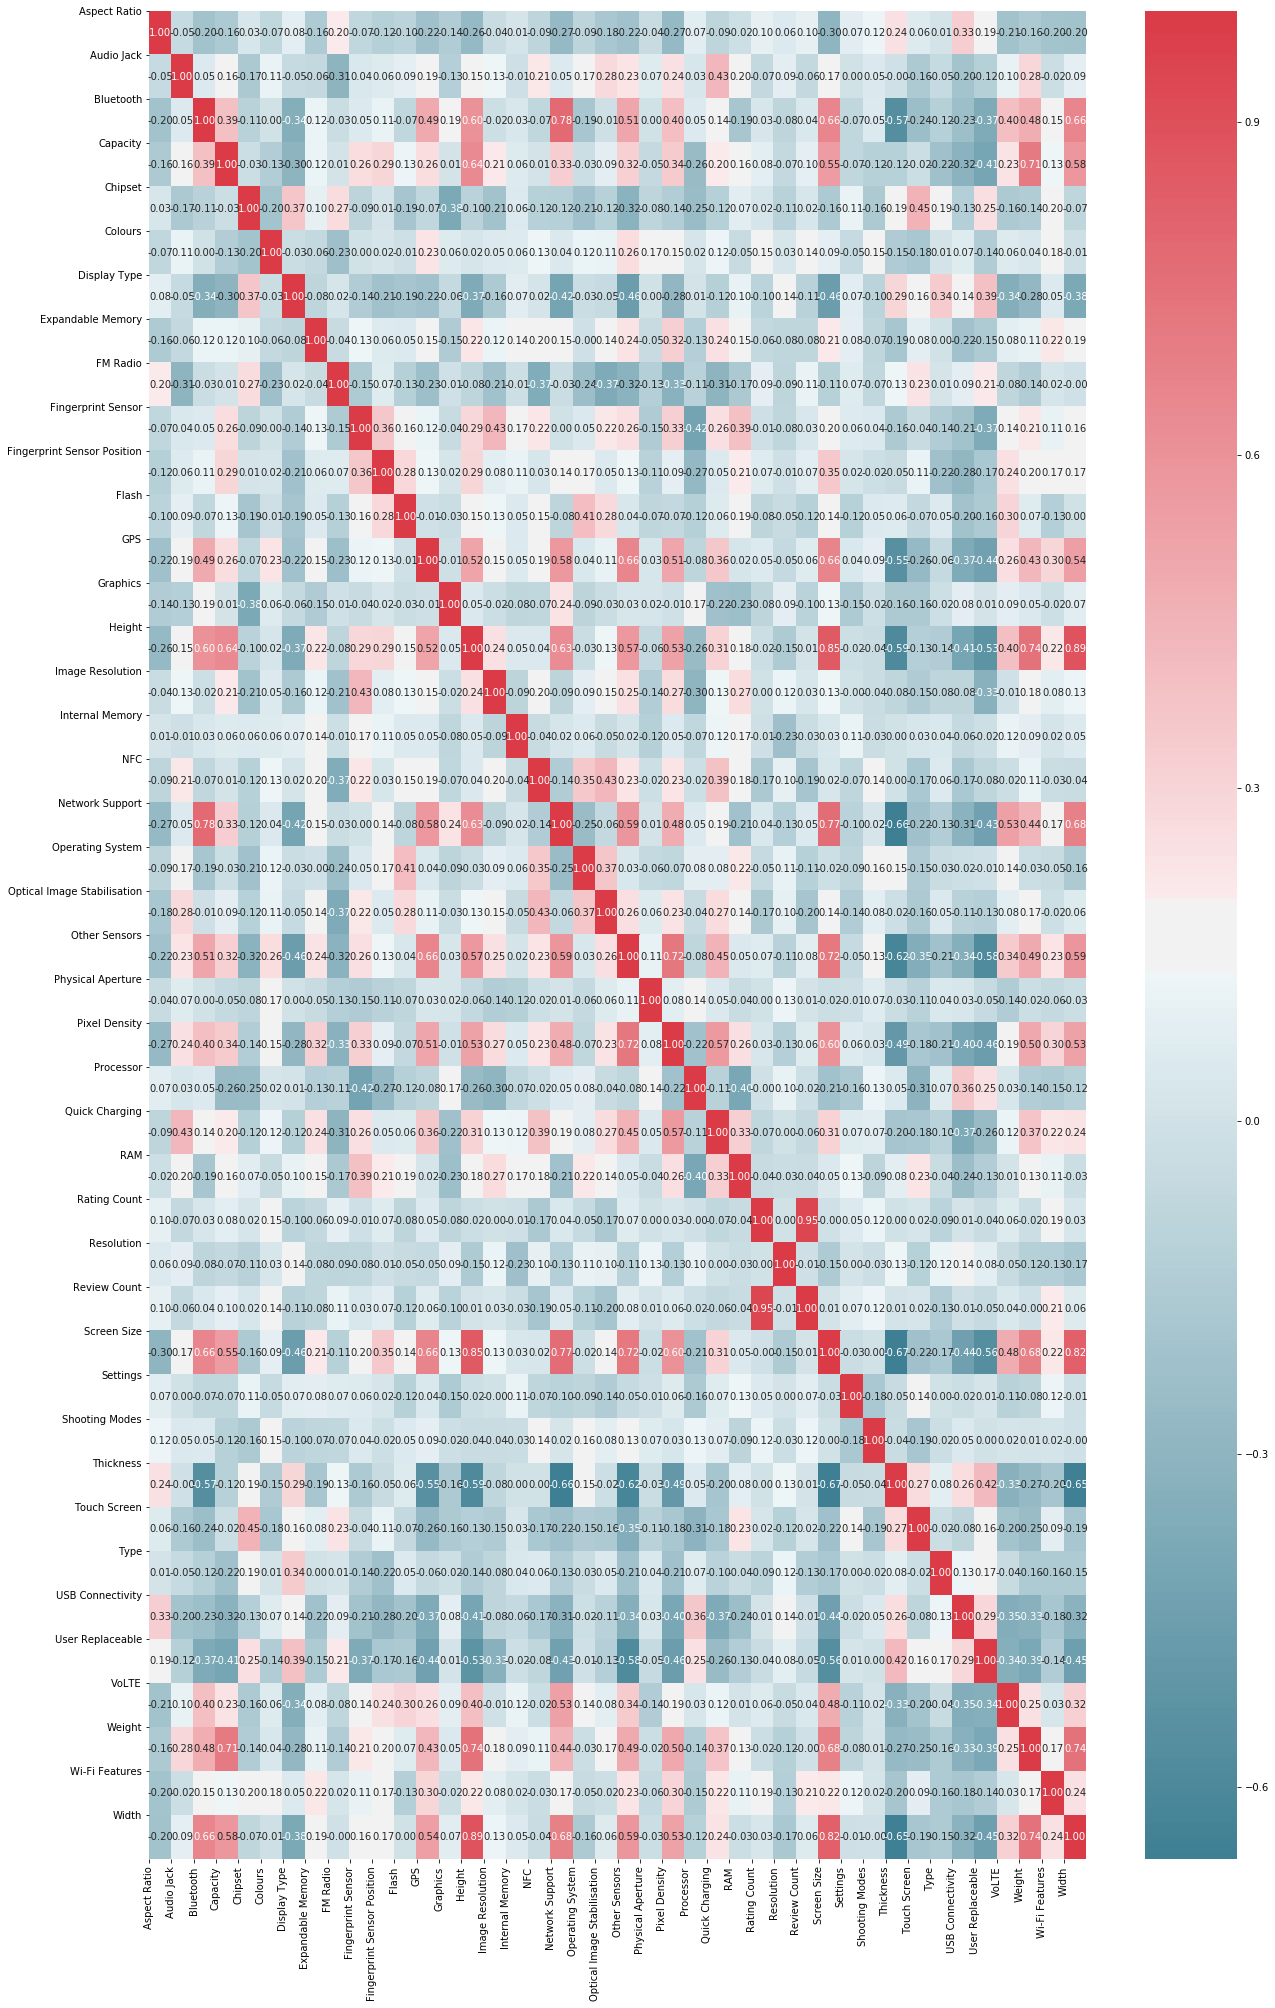

In [58]:
#Feature Correlation Matrix
import seaborn as sns
corr = X.corr()
fig, ax = plt.subplots(figsize=(21, 34))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()